In [1]:
import datetime
start_time = datetime.datetime.now()
start_time

datetime.datetime(2022, 4, 24, 12, 9, 48, 744930)

In [2]:
# Also runs installation of dependencies
from lib.util import *

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import dtale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
df = read_csv('../dataset/TEDS-D-2019-DS0001-bndl-data-tsv_V1.zip')
df.shape

(1722503, 76)

In [5]:
df.head()

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


In [6]:
df.columns

Index(['DISYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES',
       'DETCRIM', 'LOS', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE',
       'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'SERVICES_D',
       'REASON', 'EMPLOY_D', 'LIVARAG_D', 'ARRESTS_D', 'DSMCRIT', 'AGE',
       'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2',
       'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'ROUTE1', 'ROUTE2', 'ROUTE3',
       'FREQ1', 'FREQ2', 'FREQ3', 'FREQ1_D', 'FREQ2_D', 'FREQ3_D', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'FREQ_ATND_SELF_HELP_D', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG',
       'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG',
       'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG',
       'OTCFLG', 'OTHERFLG', 'DIVISION', 'REGION', 'IDU', 'ALCDRUG'],
      dtype='object')

In [7]:
df.nunique(axis=0)

DISYR             1
CASEID      1722503
STFIPS           49
CBSA2010        279
EDUC              6
             ...   
OTHERFLG          2
DIVISION         10
REGION            5
IDU               3
ALCDRUG           4
Length: 76, dtype: int64

## PCA Testing (Select Features, 2 components)

In [8]:
test_df = df.head()

features = ['LOS','SERVICES','PSOURCE','SUB1','ROUTE1','FREQ1','DSMCRIT','PSYPROB','HLTHINS']
test_df = preprocess_df(test_df, features, StandardScaler())

pca, transformed_X = unsupervised_model(test_df, features, PCA(n_components=2))

principalDf = pd.DataFrame(data = transformed_X, columns = ['PC1','PC2'])

final_df = pd.concat([principalDf, test_df[['REASON']]], axis=1)

In [9]:
pca_scatter_plot(final_df, 'PC1', 'PC2', 'REASON')

## PCA Testing (All Columns, 2 components)

In [10]:
# All Columns
test_df = df.head()

features = df.columns.drop(['REASON'])
test_df = preprocess_df(test_df, features, StandardScaler())

pca, transformed_X = unsupervised_model(test_df, features, PCA(n_components=2))

principalDf = pd.DataFrame(data = transformed_X, columns = ['PC1','PC2'])

final_df = pd.concat([principalDf, test_df[['REASON']]], axis=1)

In [11]:
pca_scatter_plot(final_df, 'PC1', 'PC2', 'REASON')

### PCA Variance and Clustering?

In [12]:
test_df = df.head(n=20)

pca, transformed_X = unsupervised_model(test_df, features, PCA(n_components=20))

components = range(pca.n_components_)

In [13]:
bar_chart(components, pca.explained_variance_ratio_, 'PCA features', 'variance %')

Looks like a slight dropoff after four components.

In [14]:
PCA_components_df = pd.DataFrame(transformed_X)
PCA_components_df.shape

(20, 20)

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


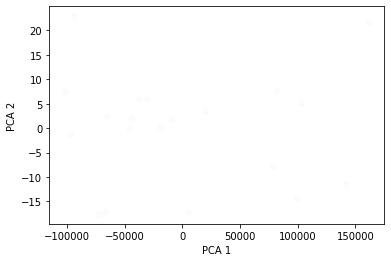

In [15]:
%matplotlib inline
plt.scatter(PCA_components_df[0], PCA_components_df[1], alpha=.01, color='black') #Alpha reduced to look for clustering
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Roughly three clusters? Hard to reduce alpha much further for clarity.

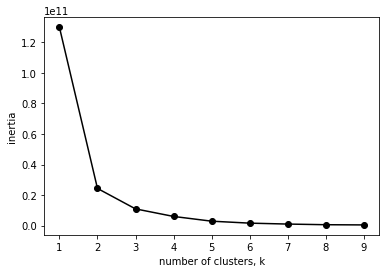

In [16]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components_df.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Slight elbow after 3 clusters.

## Completion Rates by...

### State

In [17]:
df2 = df.copy()
state_completion_df = df2.groupby(['STFIPS','REASON']).size().reset_index()

In [18]:
state_completion_df = state_completion_df.rename(columns={0:'COUNT'})

In [19]:
state_completion_df['PERC'] = 100 * state_completion_df['COUNT'] / state_completion_df.groupby(['STFIPS'])['COUNT'].transform('sum')

state_completion_df = state_completion_df.replace({'STFIPS': STATE_DICT})
state_completion_df = state_completion_df.replace({'REASON': REASON_DICT})

In [20]:
%matplotlib inline

import altair as alt

bar = alt.Chart(state_completion_df).mark_bar().transform_calculate(
        filtered='datum.REASON == "1 - Treatment Completed" ? datum.PERC : 0'
        ).encode(
            x=alt.X('PERC:Q', scale=alt.Scale(domain=(0,100)), axis=alt.Axis(title='Percentage of Cases')),
            y=alt.Y('STFIPS:N', sort=alt.SortField('filtered', order = 'descending'), axis=alt.Axis(title='State')),
            color='REASON:N',
            tooltip=['REASON'],
            order=alt.Order('REASON',sort='ascending')).interactive()
bar.save('../report/assets/completion-rates.html')
bar

alt.Chart(...)

### Choropleth Testing

In [21]:
state_reason1_df = state_completion_df[state_completion_df['REASON']=='1 - Treatment Completed']

In [22]:
state_abbv_df = state_completion_df.replace({'STFIPS':US_STATE_TO_ABBREV})

state_abbv_df

,STFIPS,REASON,COUNT,PERC
0,AL,1 - Treatment Completed,4229,33.913392
1,AL,2 - Dropped out of treatment,4337,34.779471
2,AL,3 - Terminated by facility,989,7.931034
3,AL,4 - Transferred to another treatment/facility,1636,13.119487
4,AL,5 - Incarcerated,262,2.101043
...,...,...,...,...
333,PR,3 - Terminated by facility,119,4.283657
334,PR,4 - Transferred to another treatment/facility,95,3.419726
335,PR,5 - Incarcerated,42,1.511879
336,PR,6 - Death,51,1.835853


In [23]:
map_chart(state_abbv_df, 
          'PERC', 
          1, 
          'Completion Percentage', 
          '2019 Substance Treatment Completion Rates by State',
          states='ALL',
          is_static=True)

### Region/Census Division

In [24]:
df2 = df.copy()
completion_df = df2.groupby(['DIVISION','REASON']).size().reset_index()
completion_df = completion_df.rename(columns={0:'COUNT'})
completion_df['PERC'] = 100 * completion_df['COUNT'] / completion_df.groupby(['DIVISION'])['COUNT'].transform('sum')

bar = alt.Chart(completion_df).mark_bar().encode(
    x='DIVISION:N',
    y='PERC',
    color='REASON:N',
#    order=alt.Order('PERC', sort='ascending')
)

bar

alt.Chart(...)

### Treatment Type @ Admission

In [25]:
df3 = df.copy()
completion_df = df3.groupby(['SERVICES','REASON']).size().reset_index()
completion_df = completion_df.rename(columns={0:'COUNT'})
completion_df['PERC'] = 100 * completion_df['COUNT'] / completion_df.groupby(['SERVICES'])['COUNT'].transform('sum')

bar = alt.Chart(completion_df).mark_bar().encode(
    x='SERVICES:N',
    y='PERC',
    color='REASON:N',
#    order=alt.Order('PERC', sort='ascending')
)

bar

alt.Chart(...)

### Treatment Type @ Discharge

In [26]:
df4 = df.copy()
completion_df = df4.groupby(['SERVICES_D','REASON']).size().reset_index()
completion_df = completion_df.rename(columns={0:'COUNT'})
completion_df['PERC'] = 100 * completion_df['COUNT'] / completion_df.groupby(['SERVICES_D'])['COUNT'].transform('sum')

bar = alt.Chart(completion_df).mark_bar().encode(
    x='SERVICES_D:N',
    y='PERC',
    color='REASON:N',
#    order=alt.Order('PERC', sort='ascending')
)

bar

alt.Chart(...)

In [27]:
end_time = datetime.datetime.now()
end_time

datetime.datetime(2022, 4, 24, 12, 10, 5, 548724)

In [28]:
# How long it took to run our entire notebook
end_time - start_time

datetime.timedelta(seconds=16, microseconds=803794)